# Loan status Prediction
To predict where you are eligible for the loan or not with the help of your submitted information


# Problem Statement:
Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

### What is Loan?:
- **Loan**: The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount. In many cases, the lender also adds interest and/or finance charges to the principal value which the borrower must repay in addition to the principal balance. Loans may be for a specific, one-time amount, or they may be available as an open-ended line of credit up to a specified limit. Loans come in many different forms including secured, unsecured, commercial, and personal loans.

# About the Data:
- Attributes:

![columns_meaning.png](https://lh4.googleusercontent.com/Toh_V2T2hPde7_CwbNHbO4oiAk01LykBuVEd86fSQgqiLWu4CHGavONhvBHfXBMCW9Q8S32WmiI5bge5uIZ_70KWbhu_x8Vl-VCF4PC1BkyDn7v4m1q0hfRiF4NfL4U9mdpGSdoA)

# Importing Libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set()
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [239]:
data = pd.read_csv('data/train.csv')
print("Top 5 rows from the data: ")
data.head()

Top 5 rows from the data: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---
* _What are the features of dataset?_
---

In [240]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(data)
    

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1)

**Observations**:
1. The data is no that large.
2. Our target class is in the form of **Binary(i.e. YES or NO, also 0 or 1)**.
3. Data contains some null values.
4. Data has 12 columns and a column called **LOAN STATUS** is our target column

# Exploratory Data Analysis

- Statistical Description

In [241]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [242]:
# Analyzing the target variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [243]:
# Let's normalize and check the proportion
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

- 422 loan requests has been approved out of 614 where percentage of approval is (69%)

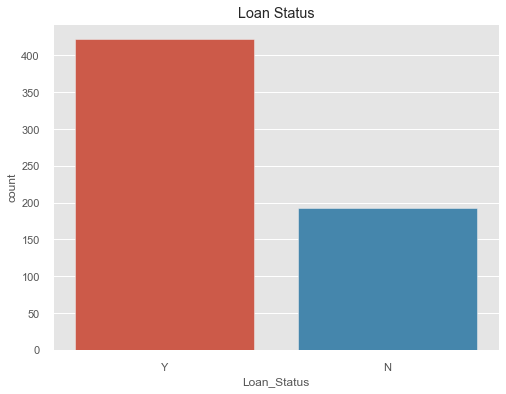

In [244]:
# Representing each category using visualization
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.show()

### Visualizing each variable 
- Different types of variables in our dataset are Categorical, ordinal and numerical.

*Categorical features:* These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

*Ordinal features:* Variables in categorical features having some order involved (Dependents, Education, Property_Area)

*Numerical features:* These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

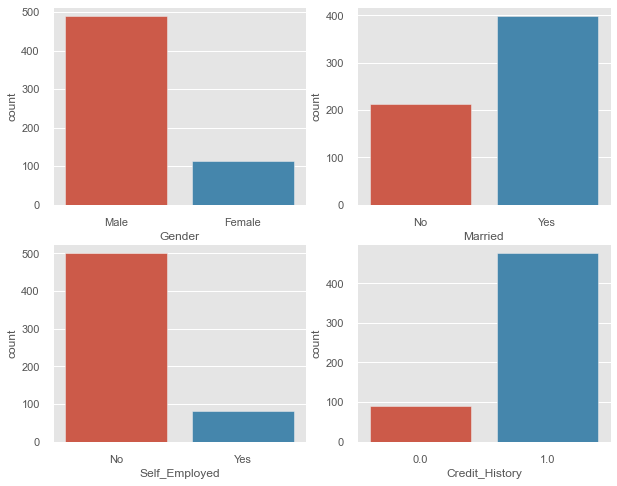

In [245]:
# Analyzing independent variable (Categorical)

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=data)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=data)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=data)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=data)
# plt.title('Credit_History')
plt.show()

### Observations from above plots:
1. Nearly 80% of the applicants in dataset are Male.
2. Nearly 65% of the applicants in dataset are Married.
3. Nearly 15% of the applicants in dataset are Self Employed. 
4. Nearly 85% of the applicants have repaid their debts.

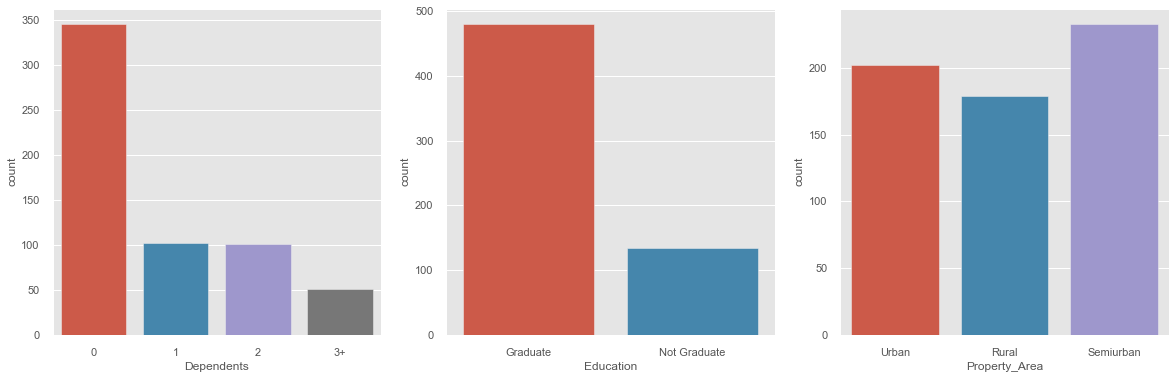

In [246]:
# Analyzing Independent variable (Ordinal)

plt.figure(figsize=(20,6))
plt.figure(num=1)
plt.subplot(131)
sns.countplot(x='Dependents', data=data)
plt.subplot(132)
sns.countplot(x='Education', data=data)
plt.subplot(133)
sns.countplot(x='Property_Area', data=data)
plt.show()

### Observations can be made from above barplots:
- Most of the applicants doesn't have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are form Semi-Urban Area

## Numerical Analysis

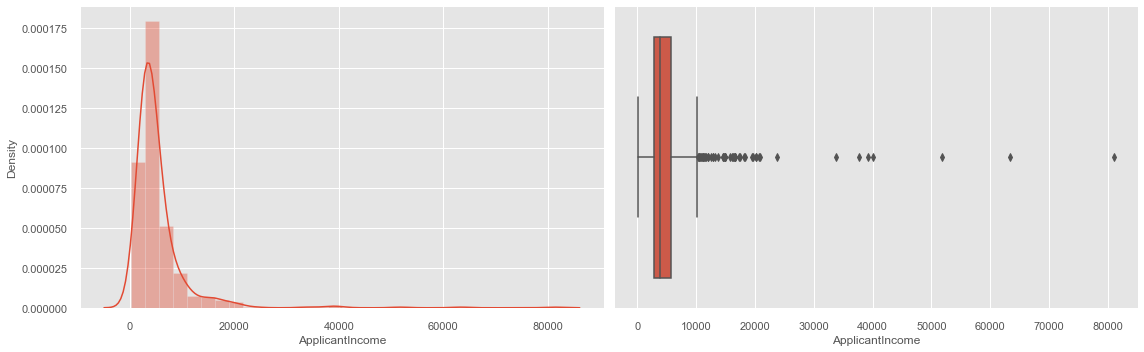

In [247]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],bins=30)
plt.subplot(122)
sns.boxplot(data['ApplicantIncome'])
plt.tight_layout()
plt.show()

### Observation:
- It can be inferred that most of the data in distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal later as algorithms works better if the dta is normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreene values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. 

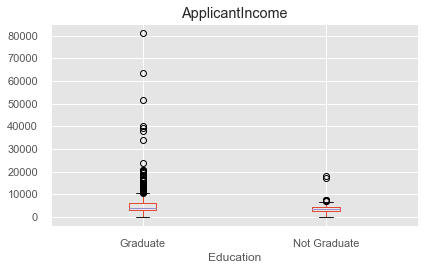

In [248]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.tight_layout()

- Grauduate people have high income than those who are Non-Graduate.

Let's see **ApplicantIncome** factor for **Marital Status and Employed type**

Text(0.5, 0.98, ' ')

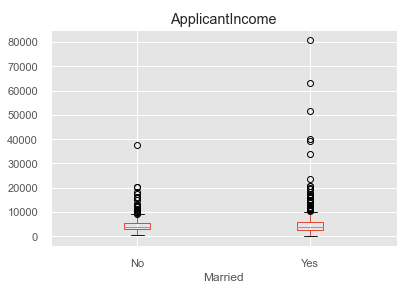

In [249]:
data.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle(' ')

- Married applicants has large amout-range of income

Text(0.5, 0.98, ' ')

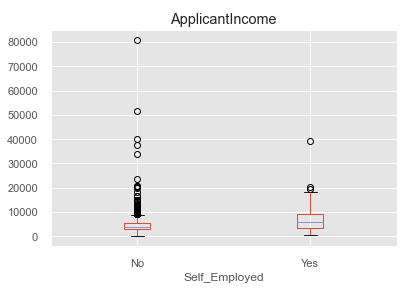

In [250]:
data.boxplot(column='ApplicantIncome', by='Self_Employed')
plt.suptitle(' ')

- Those are **Self-Employed** (business, freelancing, etc.) has lower income amount-range than applicants who are Employed.

### Observation:

Those who category who has high income range are also appearnig to be the outliers.

<Figure size 432x288 with 0 Axes>

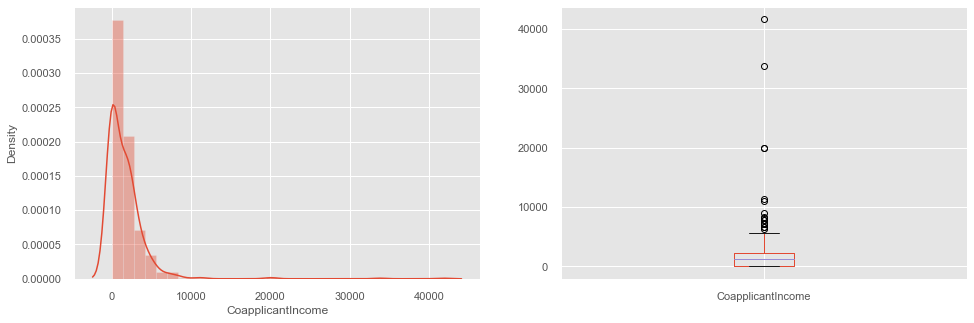

In [251]:
plt.figure(num=1)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'],bins=30)
plt.subplot(122)
data.boxplot(column='CoapplicantIncome')
plt.show()

#### We see a similar distribution as that applicant income. Majority of coapplicant's income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

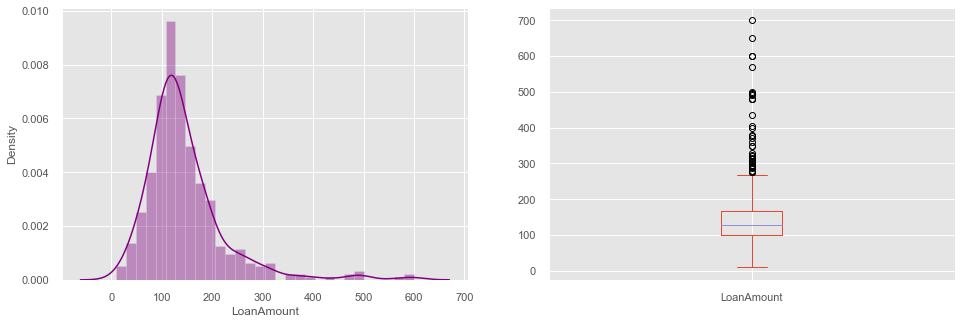

In [252]:
plt.figure(1)
plt.subplot(121)
# For better working it is necessary to drop null values
df = data.dropna()
sns.distplot(df['LoanAmount'],bins=30,color='purple')
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#### We see a lot of outliers in **LoanAmount** is variable and the distribution is fairly normal.

## PairPlot
Pairplot will plot pairwise relationships across an entire dataframe(for the numerical columns only) and supports a colos hue argument(for categorical columns).

<Figure size 1296x1008 with 0 Axes>

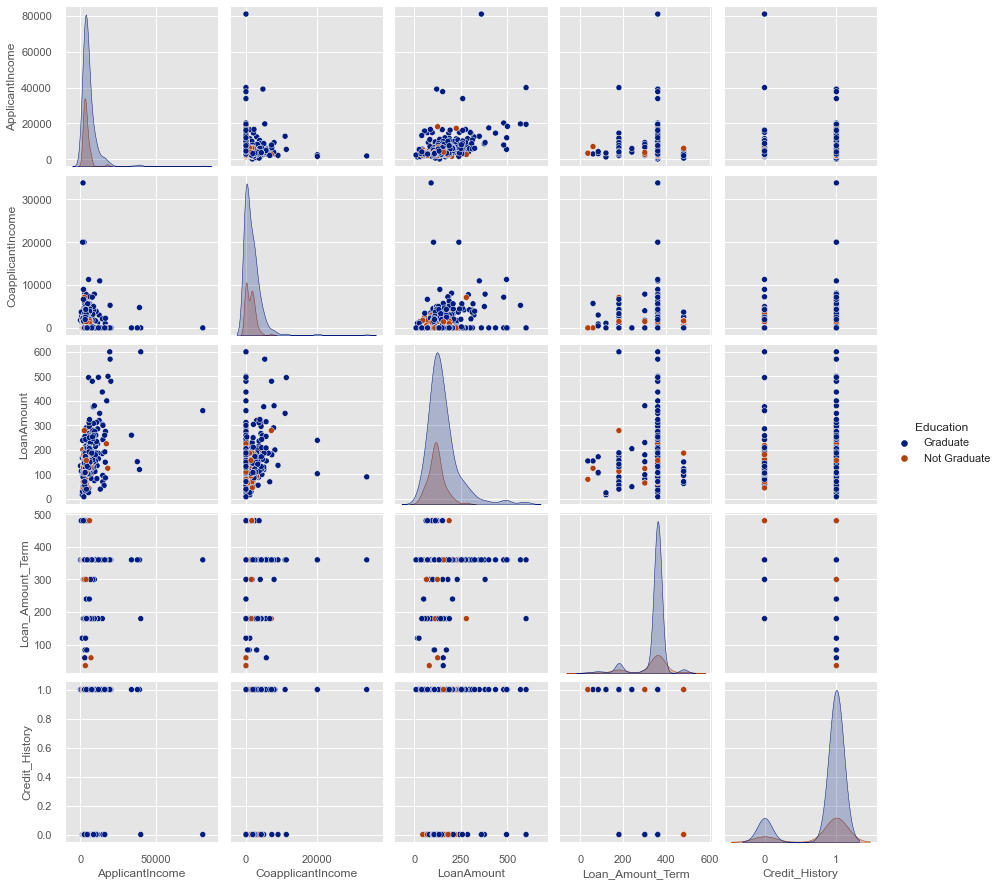

In [253]:
plt.figure(figsize=(18,14))
sns.pairplot(df,hue='Education', palette='dark')

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now exolore them again with respect to the target variable, We would like to know how well each feature correlate with our target variable Loan Status.

## Categorical Independent Variable vs Target Variable
First of all we will find the relation between target variable and categorical variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans

In [254]:
Gender = pd.crosstab(index=data['Gender'],columns=data['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


---
* _Crosstab_: A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables, a crosstab is also known as a contingency table.
---

In [255]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [256]:
female_Y = round((75/112)*100,2)
print("Percentage of Female applicants whose application is approved: {}%".format(female_Y))

Percentage of Female applicants whose application is approved: 66.96%


In [257]:
male_Y = round((339/489)*100,2)
print("Percentage of Male applicants whose application is approved: {}%".format(male_Y))

Percentage of Male applicants whose application is approved: 69.33%


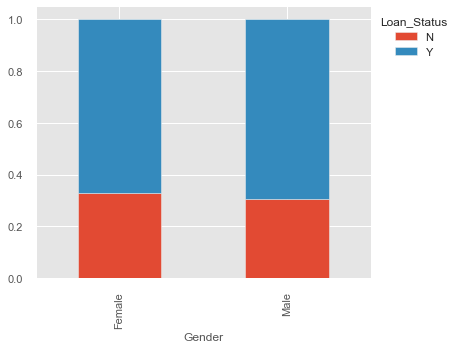

In [258]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(loc = 'upper left',bbox_to_anchor= (1,1),title='Loan_Status')
plt.show()

---
###  It can be inferred that the proportion of male anf female applicants is more or less for both approved and unapproved loans.
---

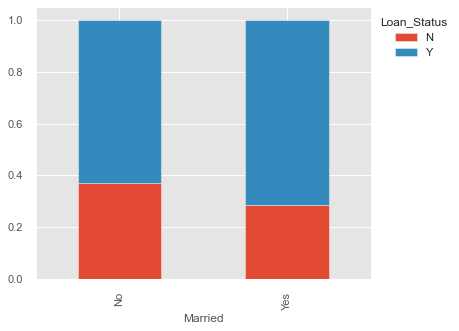

In [259]:
Married=pd.crosstab(data['Married'], data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Proportion of married applicants is higher for he approved loans.
---

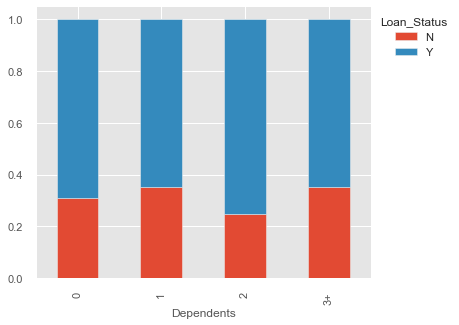

In [260]:
Dependents=pd.crosstab(data['Dependents'], data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
---

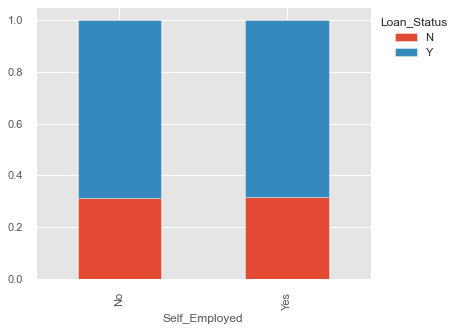

In [261]:
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

---
### Proportion of graduate applicants is higher for the approved loans. This is obivous beccause Graudate applicants fail into the higher income bracket.
---

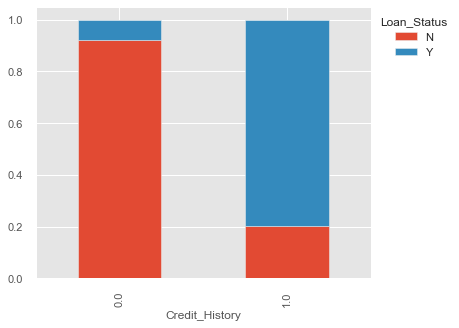

In [262]:
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

---
### 1. It seems poeple with credit history as 1 are more likely to get their loans approved.
### 2. Good credit history means good repayment capacity.
---

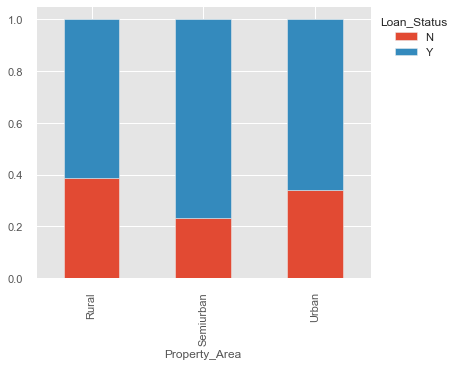

In [263]:
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

---
### Proportion of loans getting approved in semiburn area is higher compared to that in rural or urban area.
---

## Numerical Independent Variable vs Target Variable
**ApplicantIncome vs Loan_Status**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [264]:
data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


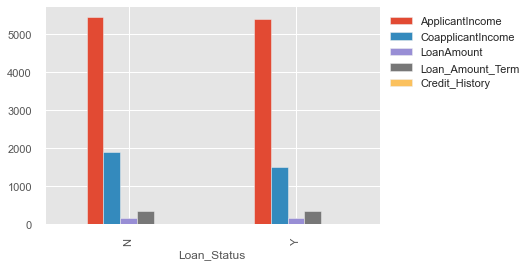

In [265]:
data.groupby('Loan_Status').mean().plot.bar()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

**Let's make bins for the applicant income variable based on the values in in and analyze the corresponding loan statys for each bin.**

In [266]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [267]:
bins = [0,2500,4000,6000,8100]
groups = ['Low', 'Average', 'High', 'Very High']

In [268]:
df.head(3) # dataframe without nan values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [269]:
data['Income_groups'] = pd.cut(df['ApplicantIncome'],bins=bins,labels=groups)

In [270]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_groups
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [271]:
data['Income_groups'].value_counts()

Average      174
High         111
Low           83
Very High     44
Name: Income_groups, dtype: int64

In [272]:
data[['ApplicantIncome', 'Income_groups', 'Loan_Status']].head(n=4)

,ApplicantIncome,Income_groups,Loan_Status
0,5849,NaN,Y
1,4583,High,N
2,3000,Average,Y
3,2583,Average,Y


In [273]:
# Pandas Crosstab function drops the NaN values by default
Income_groups = pd.crosstab(index=data['Income_groups'],columns=data['Loan_Status'])
Income_groups

Loan_Status,N,Y
Income_groups,,
Low,26,57
Average,51,123
High,32,79
Very High,15,29


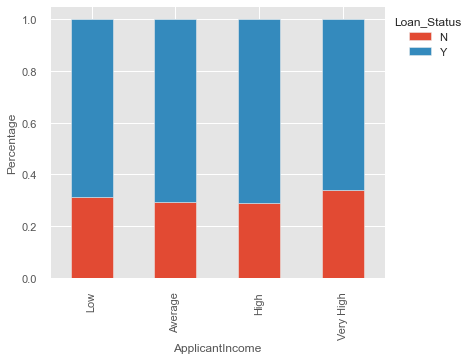

In [274]:
Income_groups.div(Income_groups.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
### We can see that Applicant Income does not affect the chances of loan approval which contradict our hypothesis in which we assumed that is the applicant income is hight the chances of gettig loan approval will also be high.

- Ho = Higher the Applicant Income higher chance of getting loan approval.(Null Hypothesis)

- Ha = Income will not affect the loan approval.(Alternate Hypothesis)

So, we are rejecting our **NULL HYPOTHESIS**

---

**Let's check same for the Coapplicant Income.**

In [275]:
bins = [0,1000,3000,4200]
groups = ['Low', 'Average', 'High']
data['coapplicant_income_groups'] = pd.cut(df['CoapplicantIncome'],bins,labels=groups)
data['coapplicant_income_groups'].value_counts()

Average    169
High        37
Low         18
Name: coapplicant_income_groups, dtype: int64

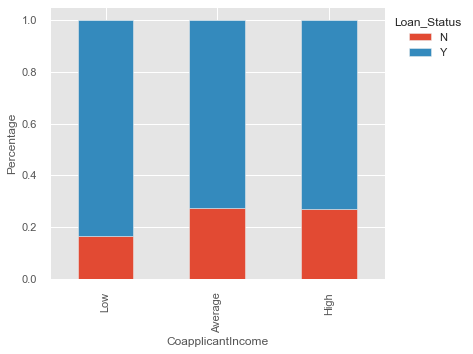

In [276]:
Coapplicant_income_groups = pd.crosstab(index=data['coapplicant_income_groups'],columns=data['Loan_Status'])
Coapplicant_income_groups.div(Coapplicant_income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
### It shows that if appliceant's income is less then chances of loan approval is high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.
---

In [277]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

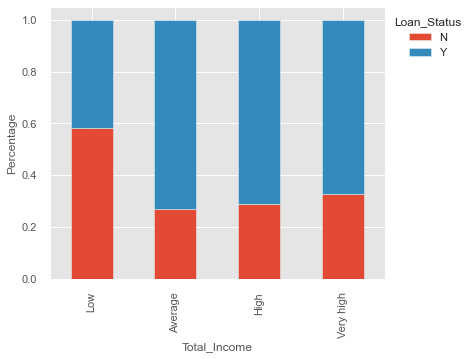

In [278]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
data['Total_Income_groups']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_groups=pd.crosstab(index=data['Total_Income_groups'],columns=data['Loan_Status'])
Total_Income_groups.div(Total_Income_groups.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

---
### We can now see that proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.
---

## LoanAmount vs Loan_Status

In [279]:
data['LoanAmount'].isnull().sum()

22

In [280]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

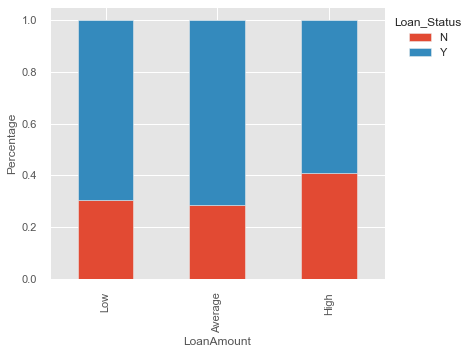

In [281]:
bins=[0,100,200,700]
groups=['Low','Average','High']
data['LoanAmount_groups'] = pd.cut(x=df['LoanAmount'],bins=bins,labels=groups)
LoanAmount_groups = pd.crosstab(index=data['LoanAmount_groups'],columns=data['Loan_Status'])
LoanAmount_groups.div(LoanAmount_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')
plt.show()

---
### It can be inferred that the proportions of Loan Approval is higher for the Low & Average Loan Amount as compared to higher Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
---

# Data Cleaning and preparation.

In [282]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_groups', 'coapplicant_income_groups', 'Total_Income',
       'Total_Income_groups', 'LoanAmount_groups'],
      dtype='object')

In [283]:
data = data.drop(labels=['Income_groups', 'coapplicant_income_groups','Total_Income','Total_Income_groups','LoanAmount_groups'],axis=1)

In [284]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### We will change the values '3+' in 'Dependents' variable to 3 to make it a numerical variable. We will make this change in both train and test sets.

In [285]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [286]:
# data['Dependents'].replace('3+',3,inplace=True)

In [287]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### We will convert target variable's ('Loan Status') categories into 0 and 1 so that we can find its correlation with numerical varibales

- We will replace N with 0 and Y with 1.


In [288]:
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

In [289]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [290]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

## Correlation between all the Numeric Variables.
- Heatmap is used to visualize the correlation

In [291]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

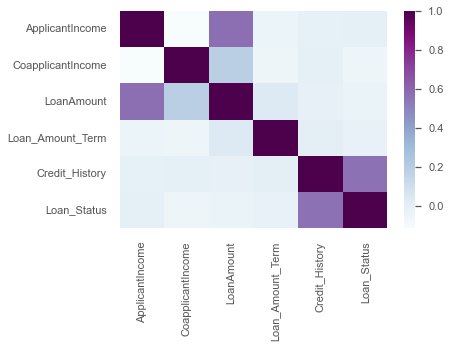

In [292]:
sns.heatmap(data=data.corr(), square=False,cmap='BuPu')

### It can be infered that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is correlated with CoapplicantIncome.

We can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [293]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in many columns. 
We can consider following methods to fill the missing values

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

In [294]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [295]:
data['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [296]:
data['Gender'].mode()

0    Male
dtype: object

In [297]:
data['Gender'].mode()[0]

'Male'

In [298]:
# imputinig the missing values using the mode of gender features
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)

In [299]:
# after imputation
data['Gender'].isnull().sum()

0

In [300]:
# check the value_counts and unique count
data['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

#### Similarly we impute missing values with mode for others

In [301]:
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)

#### Although the credit_history is a numeric feature but the values in it are binary (1 or 0), so we will use the "mode" to imput these values

In [302]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [303]:
data['Credit_History'].mode()[0]

1.0

In [304]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

### Now we wil impute the missing values for the numeric features 'LoaAmount'and 'Loan_Amount_Term'.

In [305]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [306]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### We can seen that the value of 360 is repeating the most in Loan_Amount_Term variable, so we will use the mode of this variable to replace the missing values.

In [307]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [308]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

### We can see that the 'LoanAmount' feature is highly affected by the presence of lot of outliers, so replacing the missing values by the mean() of the feature will not be the correct approach here.

### Thus to impute these missing values we will use the median() of the feature.

In [309]:
data['LoanAmount'].median()

128.0

In [310]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [311]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [312]:
data.to_csv('data/cleaned_data.csv')

## Similarly lets clean the test data

In [313]:
test_data = pd.read_csv('data/test.csv')

In [314]:
# Quick overview of the data (we made a function for that)
data_feature(test_data)

SHAPE OF THE DATA: 
(367, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         367 non-null    int64  
 1   Loan_ID            367 non-null    object 
 2   Gender             356 non-null    object 
 3   Married            367 non-null    object 
 4   Dependents         357 non-null    object 
 5   Education          367 non-null    object 
 6   Self_Employed      344 non-null    object 
 7   ApplicantIncome    367 non-null    int64  
 8   CoapplicantIncome  367 non-null    int64  
 9   LoanAmount         362 non-null    float64
 10  Loan_Amount_Term   361 non-null    float64
 11  Credit_History     338 non-null    float64
 12  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3)

In [315]:
# data_feature(data)

In [316]:
# cleaning the test data
test_data['Dependents'].replace('3+',3,inplace=True)
test_data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
test_data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

In [317]:
test_data.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Handling Outliers
---
Presence of outliers in the data mostly has a significant effect on the mean and standard deviation and thus affects the distribution of the variable.
Due to the presence of outliers in the data, bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove is by removing data points more than 90th percentile and less than 10th percentile.
---

In [318]:
# data['LoanAmount'] = np.log(data['LoanAmount'])
# data['LoanAmount'].hist(bins=30, color='purple',alpha=0.3)

---
### It can be seen that after applying the log transformation the distribution looks much closer to normal and the effect of outliers has been significantly removed.
---

In [319]:
# # Similar for test dataset
# test_data['LoanAmount'] = np.log(test_data['LoanAmount'])
# test_data['LoanAmount'].hist(bins=30, color='blue', alpha=0.3)

## Data Preprocessing

#### Since Loan_ID does not have any significance while the predicting the Loan Approval status, we will drop the Loan_ID from both the train and test datasets.

In [320]:
train = data.drop('Loan_ID',axis=1)
test = test_data.drop('Loan_ID',axis=1)

## Encoding the Categorical Variables

#### Since our train data contains the categorical features - Gender, Married, Education, Self_Employed and Property_Area which have non-numeric data so we need to convert these features into the numeric before further processing as the machine learning algorithm works with numeric data.

In [321]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [322]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [323]:
# train['Dependents'].dtypes

In [324]:
# Gender
train['Gender'] = train['Gender'].map({"Male":1, "Female":0})
test['Gender'] = test['Gender'].map({"Male":1, "Female":0})
# Marrital Status
train['Married'] = train['Married'].map({'Yes':1, 'No':0})
test['Married'] = test['Married'].map({'Yes':1, 'No':0})
# Dependents
train['Dependents'] = train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
# Education Status
train['Education'] = train['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})
# Employment Status
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})
#Property Area
train['Property_Area'] = train['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})

In [325]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [326]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)
print("-"*60)
print(train['Dependents'].value_counts())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
------------------------------------------------------------
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [327]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# train['Dependents'] = le.fit_transform(train['Dependents'])
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [328]:
# Independent Variable
X = train.drop('Loan_Status',axis=1)

# Dependent Variable(target)
y= train.Loan_Status

In [329]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [330]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#### Splitting the dataseet into train and validate
We will need to split our train dataset into training and validation sets. After training the model on the train part, we use the same model to make predictions for the validation part. The validation set is actually a part of the train dataset, which we will use to validate the prediction results with the actual results.

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [332]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 11), (154, 11), (460,), (154,))

# Model Building
Building model with different classification Machine Learning algorithms 

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [334]:
# creating dictionary of all classifier 
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SUpport Vector Classifier': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [335]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("\nClassifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 79.0 % accuracy score

Classifiers:  SVC Has a training score of 67.0 % accuracy score

Classifiers:  KNeighborsClassifier Has a training score of 65.0 % accuracy score

Classifiers:  DecisionTreeClassifier Has a training score of 70.0 % accuracy score

Classifiers:  RandomForestClassifier Has a training score of 77.0 % accuracy score


---
* From above results we can cleary see that **LogisticRegression** is a winner here, but without hyperparameter tunning we cannot judge above results so quickly.
---

## Hyperparameter tunning

In [336]:
# using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [337]:
# KNN
knn_params = {"n_neighbors":[1,3,5], 'algorithm':['auto']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_params_
print(knn)

{'algorithm': 'auto', 'n_neighbors': 5}


In [338]:
# SVC
svc_params = {'C':[0.5,1], 'kernel':['rbf','sigmoid']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_params_
print(svc)

{'C': 0.5, 'kernel': 'rbf'}


In [339]:
# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [340]:
# RandomForest
rf_params = {'n_estimators':[100,200,300],'max_features':['auto','sqrt'],"min_samples_leaf":[1,2,4],"bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(),rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_params_
print(rf)

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200}


In [341]:
# RandomForestClassifier().get_params().keys()

In [342]:
# Overfitting Case
# classifiers_params = {
#     'LogisticRegression': LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear'),
#     'SUpport Vector Classifier': SVC(C= 0.5, kernel= 'rbf'),
#     'KNeighborsClassifier': KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5),
#     'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5),
#     'RandomForestClassifier': RandomForestClassifier(bootstrap= True, max_features= 'auto', min_samples_leaf= 4, n_estimators= 200)
# }


# Logistic Regression
log_reg =  LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print('Logistic Regression: ', round(log_score.mean(),2)*100, "% accuracy score")

# Support Vector Machine
svc = SVC(C= 0.5, kernel= 'rbf', probability=True)
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5)
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier(bootstrap= True, max_features= 'auto', min_samples_leaf= 2, n_estimators= 200)
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  68.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  80.0 % accuracy score
Random Forest:  79.0 % accuracy score


### Accuracy scores of all 5 classification algoriths. Before and After
- LogisticRegression: 74.0 % || after: 80.%

- SVC: 67.0 % || after: 68%

- KNeighborsClassifier: 65.0 || after: 65.0%

- DecisionTreeClassifier: 69.0 % || after: 80.0%

- RandomForestClassifier: 67.0 % || after: 80.0%

---
*LogisticRegression* has same accuracy(80%) even after tunning. *DecisionTreeClassifier* improved by 10% after tunning, and *RandomForestClassifier* improved by only 3%. There is not much improvement in *SVC*, *KNeighborsClassifier*. Still we cannot directly choose them so for a selection we should evaluate all of them and then we will compare the models and select the best one.

---

# Model evaluation
- Evaluation, comparison and selection

ROC_AUC_SCORE of models on Train Set

Logistic Regression:  76
Support Vector Machine:  41
KNeighbors:  76
Decision Tree:  72
Random Forest:  99


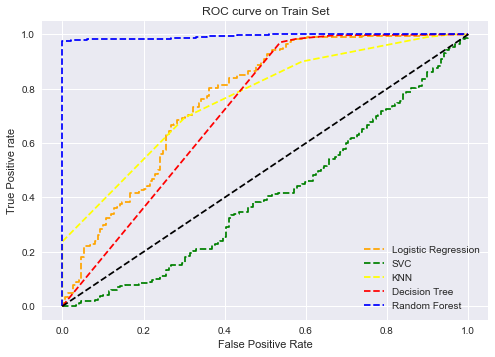

In [343]:
# ROC CURVE and ROC-AUC score

# On Train dataset

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_reg_proba = log_reg.predict_proba(X_train) 
svc_proba = svc.predict_proba(X_train)
knn_proba = knn.predict_proba(X_train)
dt_proba = dcTree.predict_proba(X_train)
rf_proba = rf.predict_proba(X_train)

# roc_auc_score
log_reg_auc = round(roc_auc_score(y_train, log_reg_proba[:,1])*100)
svc_auc = round(roc_auc_score(y_train,svc_proba[:,1])*100)
knn_auc = round(roc_auc_score(y_train, knn_proba[:,1])*100)
dt_auc =  round(roc_auc_score(y_train, dt_proba[:,1])*100)
rf_auc = round(roc_auc_score(y_train, rf_proba[:,1])*100)

print("ROC_AUC_SCORE of models on Train Set\n")
print("Logistic Regression: ", log_reg_auc)
print("Support Vector Machine: ", svc_auc)
print("KNeighbors: ",knn_auc)
print("Decision Tree: ",dt_auc)
print("Random Forest: ",rf_auc)


# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(y_train, log_reg_proba[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_train, svc_proba[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_train, knn_proba[:,1],pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_train, dt_proba[:,1],pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_train, rf_proba[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Train Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

-  Observation: From above results, *RandomForest, KNN and Logistic Regression* looks better, so now we will find the best between them but this time we will use our *Test Data*.

ROC_AUC_SCORE of models on Test Set

Logistic Regression:  75
KNeighbors:  51
Random Forest:  80


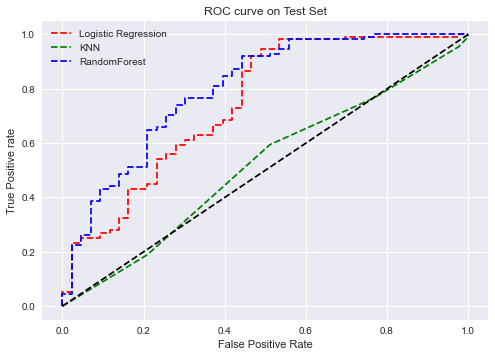

In [344]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg_proba_test = log_reg.predict_proba(X_test) 
knn_proba_test = knn.predict_proba(X_test)
rf_proba_test = rf.predict_proba(X_test)


knn_auc_test = round(roc_auc_score(y_test, knn_proba_test[:,1])*100)
log_reg_auc_test=  round(roc_auc_score(y_test, log_reg_proba_test[:,1])*100)
rf_auc_test = round(roc_auc_score(y_test, rf_proba_test[:,1])*100)

print("ROC_AUC_SCORE of models on Test Set\n")
print("Logistic Regression: ", log_reg_auc_test)
print("KNeighbors: ",knn_auc_test)
print("Random Forest: ", rf_auc_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg_proba_test[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_proba_test[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba_test[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='RandomForest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Test Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

- Observation on test set: Very poor performance by *KNN*, it goes beyond the threshold. Where *RandomForest and Logistic Regression* are still in the game and leading equally. 

## Model Selection:
---
- Well, ROC_AUC curves heled us to eliminate bad models so now we will see *Classification Report and Confusion Matrix* between the top 2 models and then we will select the best model for further process.
---

In [345]:
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)

print("Classification Report of Logisitic Regression: \n", classification_report(y_test, log_reg_preds))
print("-"*70)
print("Classification Report of Random Forest: \n", classification_report(y_test, rf_preds))

Classification Report of Logisitic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

----------------------------------------------------------------------
Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.82      0.96      0.88       111

    accuracy                           0.82       154
   macro avg       0.82      0.70      0.73       154
weighted avg       0.82      0.82      0.80       154



- Observation: Precision of the classification reports of both the models is very good bu recall is very pure in both reports. Our focus is on *Precision* than any other factor.


- Why precision > recall? Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of applicants that we correctly identify having a Loan acceptance out of all the applicants actually having the acceptance. Where *recall* tells for the applicants who actually have an acceptance, how many we correctly identified as having loan acceptance. So aim is to choose the model with higher precision.

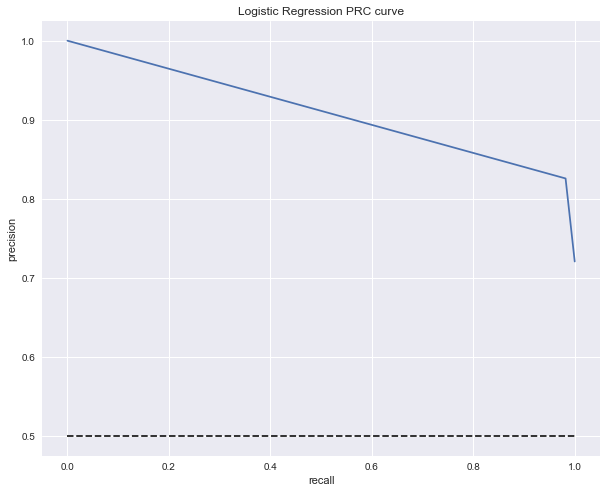

In [346]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve

precision1, recall1, thresholds1 = precision_recall_curve(y_test, log_reg_preds)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, rf_preds)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall1, precision1, label='Logistic Regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Logistic Regression PRC curve')
plt.show()

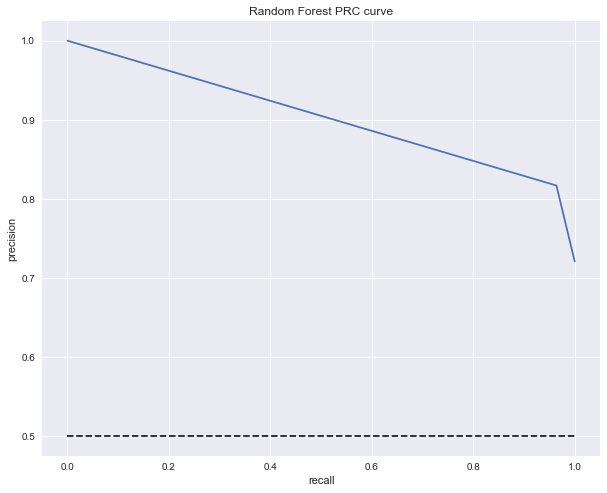

In [347]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall2, precision2, label='Random Forest')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest PRC curve')
plt.show()

- Observation: precision-recall curves of both the classifiers looks simiilar so let's find confusion matrix.

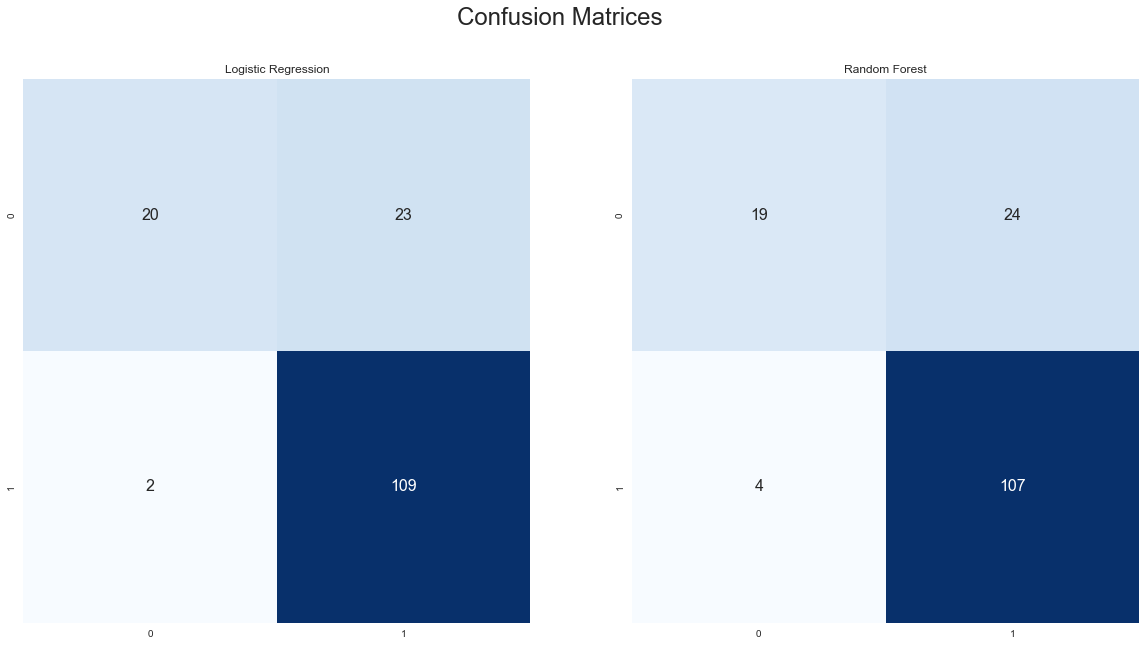

In [348]:
# confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrices ", fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression")
sns.heatmap(log_reg_cm,cbar=False, cmap="Blues", annot=True,annot_kws={'size':16},fmt='g')

plt.subplot(1,2,2)
plt.title("Random Forest")
sns.heatmap(rf_cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

plt.show()

- Observation: *True Positive* i.e.(1-1) in the confusion matrices of both the model has same value *109*, actually both are similar but here *Logistic Regression* has 1 values extra in *True Negative*. So selecting ***Logistic Regression*** for this problem statement.

In [349]:
print("Logistic Regression's confusion matrix evaluation: ")
pd.crosstab(y_test, log_reg_preds, rownames=['Actual'],colnames=['Predicted'], margins=True)

Logistic Regression's confusion matrix evaluation: 


Predicted,0,1,All
Actual,,,
0,20,23,43
1,2,109,111
All,22,132,154


## Saving the best model

In [350]:
import pickle
file = 'log_reg.pkl'
pickle.dump(log_reg, open('log_reg.pkl', 'wb'))

In [351]:
# Testing the model

model = open('log_reg.pkl','rb')
model_test = pickle.load(model)

log_reg_test = model_test.score(X_test, y_test)
print(log_reg_test)

0.8376623376623377


### End of analytical, cleaning, model building and model evaluation part. Second stage is to create webapp for end to end users.